#Необходимые вещи из прошлых ноутбуков

In [149]:
import numpy as np  

import seaborn as sns

In [150]:
np.random.seed(42)

Сгенерируем выборку:

In [151]:
def linear_func(x):
    target_k = -3
    target_b = 10
    return target_k * x + target_b

def linear_func2(x):
    target_k = 5
    target_b = -2
    return target_k * x + target_b

In [152]:
xes = np.linspace(0, 1, 11)

print(xes)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [153]:
target_ys = np.array([linear_func(x) for x in xes])
print(target_ys)

[10.   9.7  9.4  9.1  8.8  8.5  8.2  7.9  7.6  7.3  7. ]


In [154]:
noise = np.random.normal(0, 0.1, 11)
noisy_target_ys = target_ys + noise

print(noisy_target_ys)

[10.04967142  9.68617357  9.46476885  9.25230299  8.77658466  8.4765863
  8.35792128  7.97674347  7.55305256  7.354256    6.95365823]


<AxesSubplot: >

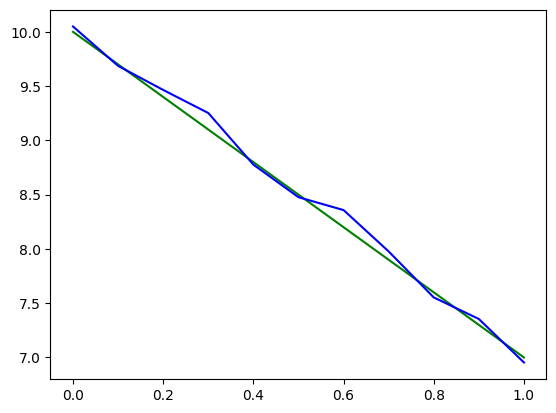

In [155]:
sns.lineplot(x = xes, y = target_ys, color = "g")
sns.lineplot(x = xes, y = noisy_target_ys, color = "b")


#Начало нового материала

Переходим к более сложным конструкциям — несколько входных параметров, несколько нейронов.

Создадим линейный слой — основной элемент нашей сети.

In [156]:
class SimpleLinearLayer:
    def __init__(self, input_size, output_size):
        
        self.input_size = input_size
        self.output_size = output_size
        
        self.W = np.random.random_sample((output_size, input_size)) * 2 - 1
        self.b = np.random.random_sample((output_size,)) * 2 - 1
            
        self.grad_W = np.zeros((output_size, input_size))
        self.grad_b = np.zeros((output_size,))
        
    def forward(self, x):
        h = self.W @ x + self.b 
        return h
    
    def backward(self, delta_next, w_next):
        return w_next.T @ delta_next

    def backward_as_last_layer(self, loss_der):
        return loss_der
    
    def clear_grad(self):
        self.grad_W = np.zeros((self.output_size, self.input_size))
        self.grad_b = np.zeros((self.output_size,))

In [157]:
import tqdm


class SimpleNN:
    def __init__(self, structure, loss, loss_derivative):
        self.structure = structure
        self.layers = []
        self.loss = loss
        self.loss_derivative = loss_derivative
        for i in range(1, len(structure)):
            print(i, structure[i-1], structure[i])
            self.layers.append(SimpleLinearLayer(structure[i-1], structure[i]))
        
    def apply(self, x):
        h_array = [x]
        for layer in self.layers:
            h = layer.forward(h_array[-1])
            h_array.append(h)
        return h_array[-1]
    
    def forward(self, x):
        h_array = [x]
        for layer in self.layers:
            h = layer.forward(h_array[-1])
            h_array.append(h)
        return h_array
    
    def clear_grad_values(self):
        for layer in self.layers:
            layer.clear_grad()
    
    def train(self, X, y, iter_num = 500, alpha = 0.1):
        cnt = 0
        m = len(y)
        avg_cost_func = []     
        for _ in tqdm.tqdm(range(iter_num)):    
            avg_cost = 0
            self.clear_grad_values()
            for i in range(len(y)):
                # one sample per time
                # forward
                h = self.forward(X[i, :])

                # backward pass
                grads = {}
                for layer_num, layer in reversed(list(enumerate(self.layers))):
                    if layer_num == len(self.layers) - 1:
                        loss_deriv = self.loss_derivative(h[-1], y[i,:])
                        avg_cost += self.loss(h[-1], y[i,:])
                        grads[layer_num] = layer.backward_as_last_layer(loss_deriv)
                    else:
                        grads[layer_num] = layer.backward(grads[layer_num+1], self.layers[layer_num+1].W)
                    layer.grad_W += grads[layer_num][:,np.newaxis] @ np.transpose(h[layer_num][:,np.newaxis])
                    layer.grad_b += grads[layer_num]
                        
            # update weights
            for layer in self.layers:
                layer.W -= alpha * (layer.grad_W / m)
                layer.b -= alpha * (layer.grad_b / m)
                
            # complete the average cost calculation
            avg_cost = avg_cost / m
            avg_cost_func.append(avg_cost)
            
        return avg_cost_func

Зададим метрики:

In [158]:
def MSE_loss(x, y):
    return ((x-y) ** 2).mean()

def MSE_loss_derivative(x, y):
    return 2 * (x - y)

Реализуем обучение нашей модели:

1 1 4
2 4 4
3 4 1
[1.70575389]


100%|██████████| 250/250 [00:00<00:00, 2226.17it/s]

0.014239096833848816
[47.45942848654906, 25.932179008311717, 9.046808413220305, 2.2722465911692464, 1.5574711341405616, 1.4813929631817062, 1.4111998121951508, 1.3435876904633288, 1.278473593735937, 1.2157809726359257, 1.15543845453008, 1.0973791996706417, 1.0415403146023938, 0.9878623177031636, 0.9362886527498755, 0.8867652471109125, 0.8392401117413345, 0.7936629806200268, 0.7499849876305991, 0.7081583791623474, 0.6681362609045521, 0.6298723774365542, 0.5933209232866402, 0.5584363841537141, 0.5251734069657377, 0.49348669739638157, 0.46333094338463887, 0.4346607631092144, 0.4074306757681048, 0.38159509341103354, 0.35710833197500214, 0.33392463958705926, 0.3119982401284698, 0.2912833900051193, 0.27173444604315256, 0.25330594242880156, 0.23595267463807168, 0.2196297883555216, 0.20429287146084976, 0.1898980472656026, 0.1764020673076364, 0.16376240215468527, 0.15193732882717054, 0.1408860136202444, 0.1305685892820108, 0.12094622568510373, 0.11198119330827237, 0.10363691902006343, 0.0958780

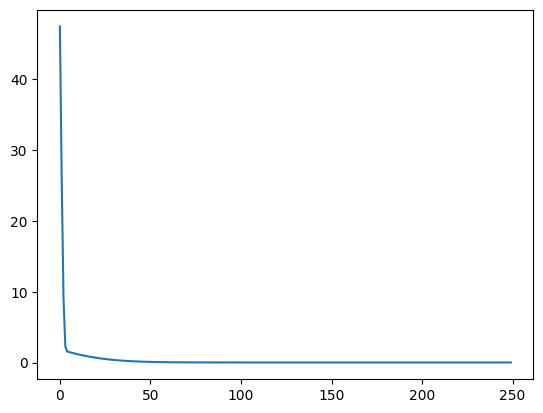

In [159]:
N = SimpleNN([1,4,4,1], MSE_loss, MSE_loss_derivative)

print(N.apply([1]))

avg_cost_func = N.train(xes.reshape(-1, 1), noisy_target_ys.reshape(-1, 1), 250, 0.01)

print(sum(avg_cost_func[-3:]))

sns.lineplot(data=avg_cost_func)


prediction = N.apply([2])
print(prediction)